**Project-Based Internship**\
Nama : M. Arief Rahman Hakim\
ID/X Partner by Rekamin

# **Data Understanding – Prediksi Risiko Kredit**

## 1. Ringkasan Dataset

Dataset yang digunakan berisi informasi historis pinjaman dengan total **466.285 baris** dan **75 kolom**. Dataset ini mencakup informasi dari peminjam, jumlah dan kondisi pinjaman, status verifikasi, serta status akhir dari pinjaman tersebut.

### Struktur Dataset:
- **Jumlah Baris**: 466.285
- **Jumlah Kolom**: 75
- **Sumber**: IDX Partners: Loan Data 2007-2014
- **Tujuan**: Memprediksi **Good** or **Bad** dari pinjaman berdasarkan atribut awal saat pinjaman disetujui.

---

## 2. Pemahaman Kolom / Atribut

Berikut beberapa kolom yang penting dan sering digunakan dalam pemodelan risiko kredit:

| Nama Kolom          | Deskripsi                                       | Tipe Data     |
|---------------------|--------------------------------------------------|---------------|
| `loan_amnt`         | Jumlah pinjaman yang diajukan                    | Numerik       |
| `term`              | Durasi pinjaman (36 atau 60 bulan)               | Kategorikal   |
| `int_rate`          | Bunga pinjaman dalam persen                     | Numerik       |
| `installment`       | Cicilan bulanan                                 | Numerik       |
| `grade`, `sub_grade`| Kategori skor kredit internal                   | Kategorikal   |
| `emp_length`        | Lama bekerja peminjam                           | Kategorikal   |
| `home_ownership`    | Status kepemilikan rumah                        | Kategorikal   |
| `annual_inc`        | Pendapatan tahunan                              | Numerik       |
| `verification_status` | Status verifikasi pendapatan                 | Kategorikal   |
| `purpose`           | Tujuan pinjaman                                 | Kategorikal   |
| `dti`               | Debt-to-Income Ratio                            | Numerik       |
| `loan_status`       | Status akhir pinjaman (Target/Label)            | Kategorikal   |

Kolom `loan_status` akan digunakan sebagai **target prediksi**, yang dikategorikan menjadi:
- **Good**: Fully Paid, Current
- **Bad**: Charged off, Late, Default, dll

---

## 3. Eksplorasi Awal

Berikut adalah eksplorasi awal terhadap data:

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("/content/loan_data_2007_2014.csv", low_memory=False)

In [5]:
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])

Jumlah baris: 466285
Jumlah kolom: 75


In [6]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [8]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,...,466285,466264,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,...,14,63098,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,...,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,...,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


In [9]:
df['loan_status'].value_counts(normalize=True) * 100

,proportion
loan_status,
Current,48.087757
Fully Paid,39.619332
Charged Off,9.109236
Late (31-120 days),1.479782
In Grace Period,0.674695
Does not meet the credit policy. Status:Fully Paid,0.426349
Late (16-30 days),0.261214
Default,0.178432
Does not meet the credit policy. Status:Charged Off,0.163205


Hasil eksplorasi awal terhadap dataset menunjukkan beberapa pola umum:
- `loan_amnt`: bervariasi berkisar antara `$500` sampai `$35.000`.
- `int_rate`: berkisar antara 5.42% hingga 26.06%, dengan rata-rata sekitar 13.83%.
- `term`: hanya memiliki dua nilai, yaitu 36 months dan 60 months.
- `grade`: berkisar dari A (paling rendah risiko) hingga G (paling tinggi risiko).
- `annual_inc` : sangat bervariasi, dari $1.896 sampai $7.5 juta, menunjukkan ada outlier yang perlu dianalisis.
- `loan_status`: nilai yang paling sering muncul adalah Fully Paid dan Charged Off, yang akan diklasifikasikan sebagai risiko rendah dan tinggi dalam model.

Beberapa kolom memiliki nilai kosong (missing values) yang perlu diproses lebih lanjut:
- Beberapa kolom sepenuhnya kosong (466.285 missing), seperti: `all_util`, `inq_fi`, `total_cu_tl`, dll.
- Kolom lain memiliki sebagian missing, contoh: `emp_title` (sekitar 28.000 null), `annual_inc`, `last_pymnt_d`, dan `next_pymnt_d`.
- Penting untuk dilakukan: analisis lanjutan dan keputusan eliminasi atau imputasi.

# **Exploratory Data Analysis (EDA)**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/loan_data_2007_2014.csv')

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


<ipython-input-11-df78302b1dfe>:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/loan_data_2007_2014.csv')


## **Analisis Univariate**

### 1. Distribusi loan_amnt

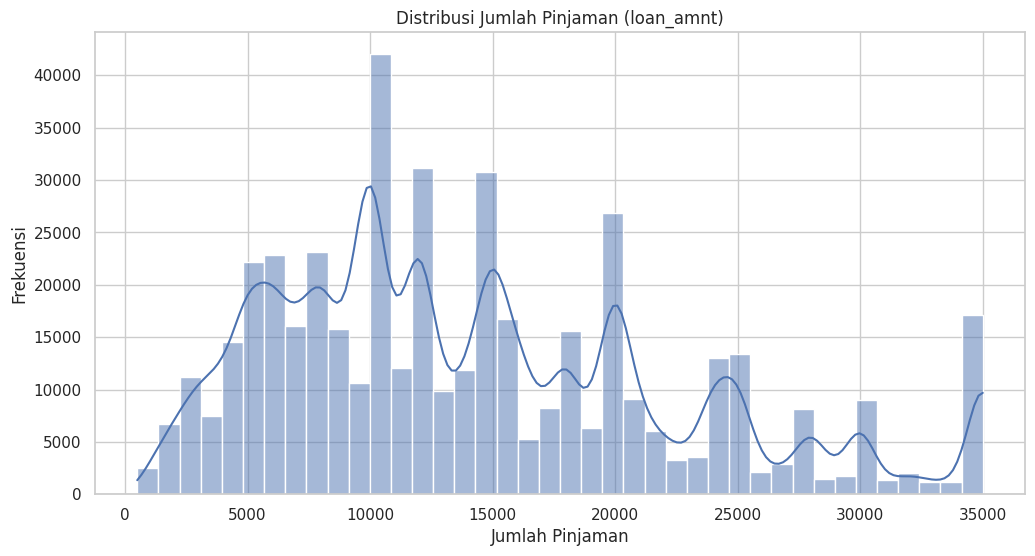

In [22]:
sns.histplot(df['loan_amnt'], kde=True, bins=40)
plt.title('Distribusi Jumlah Pinjaman (loan_amnt)')
plt.xlabel('Jumlah Pinjaman')
plt.ylabel('Frekuensi')
plt.show()

#### Hasil Analisis

Distribusi Jumlah Pinjaman (`loan_amnt`)
- Terdapat lonjakan signifikan pada nilai-nilai kelipatan tertentu seperti `$10.000`, `$15.000`, `$20.000`, dan `$35.000`.
- Ini menandakan adanya preferensi atau batasan jumlah pinjaman standar, kemungkinan berasal dari kebijakan lembaga pemberi pinjaman.
- Distribusi tidak simetris, agak mendekati distribusi multimodal.



### 2. Distribusi int_rate (bunga)

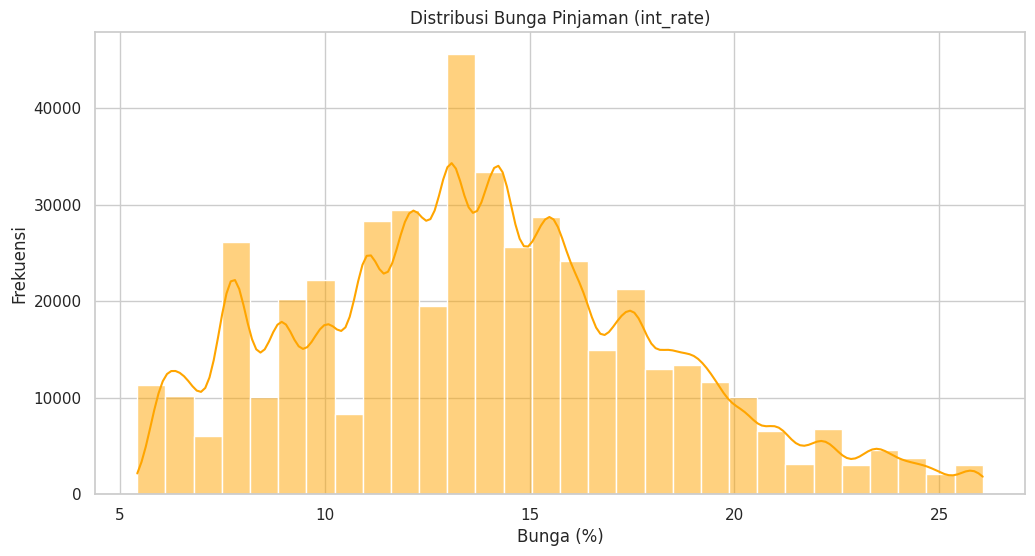

In [23]:
sns.histplot(df['int_rate'], kde=True, bins=30, color='orange')
plt.title('Distribusi Bunga Pinjaman (int_rate)')
plt.xlabel('Bunga (%)')
plt.ylabel('Frekuensi')
plt.show()

#### Hasil Analisis

Distribusi Bunga (`int_rate`)
- Mayoritas bunga berkisar antara 10% hingga 18%, dengan puncak di sekitar 13–15%.
- Menariknya, bunga tinggi (>20%) cukup jarang, yang mungkin dikaitkan dengan risiko tinggi atau pengajuan dari profil borrower dengan credit score rendah.

### 3. Distribusi loan_status (target kandidat)

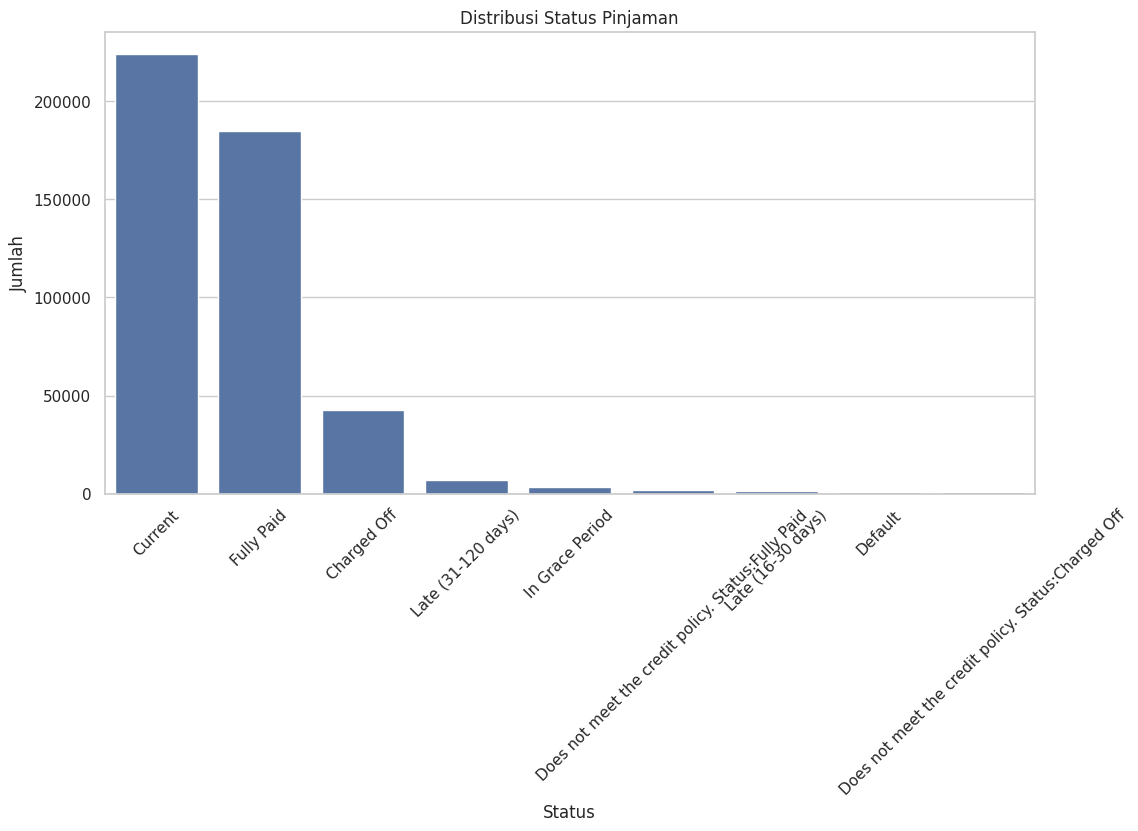

In [24]:
sns.countplot(x='loan_status', data=df, order=df['loan_status'].value_counts().index)
plt.title('Distribusi Status Pinjaman')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

#### Hasil Analisis

Distribusi Status Pinjaman (`loan_status`)\
Mayoritas pinjaman berstatus:
- Current (~224K)

- Fully Paid (~185K)

Sementara status gagal bayar atau buruk meliputi:

- Charged Off (~43K)

- Late, Default, Grace Period, dan kategori khusus lainnya.

Artinya, dataset ini cukup imbalance, sehingga nanti perlu diperhatikan saat training model.

## **Analisis Bivariate – Perbandingan antar fitur**

### Perbandingan loan_amnt terhadap loan_status

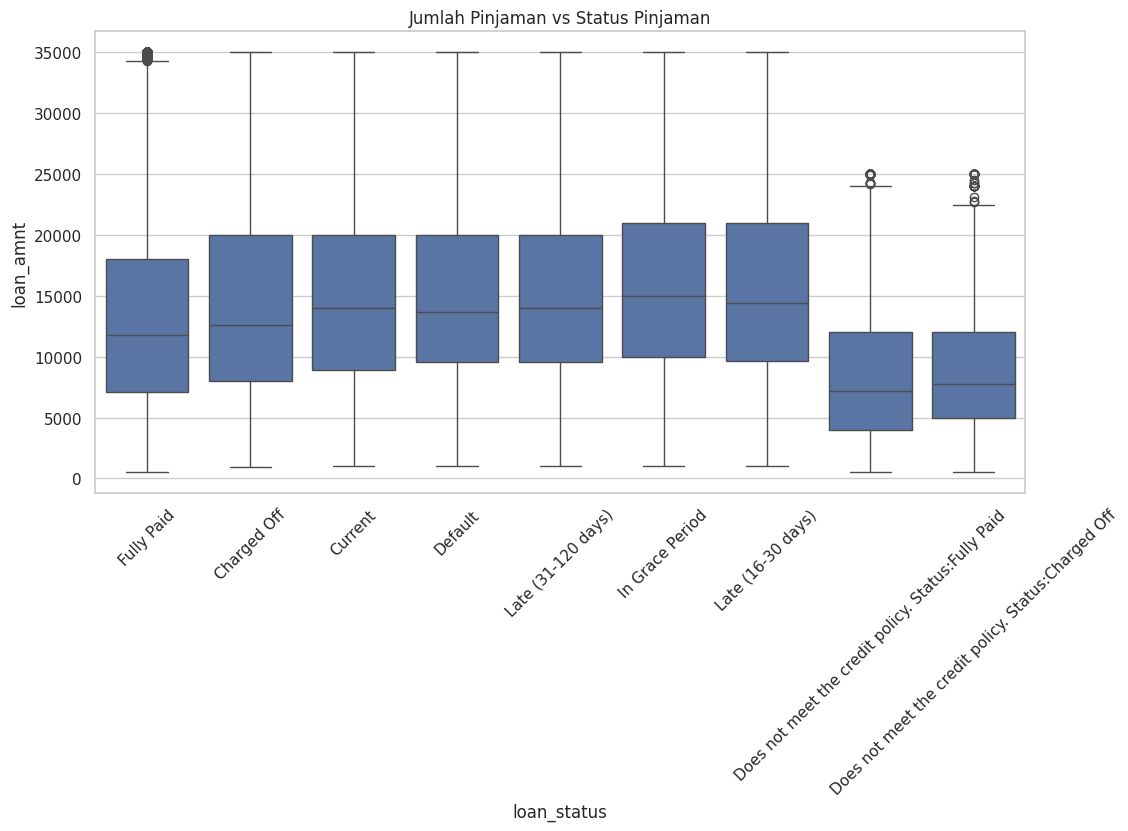

In [26]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.title('Jumlah Pinjaman vs Status Pinjaman')
plt.xticks(rotation=45)
plt.show()

#### Hasil Analisis

`loan_amnt` vs `loan_status`\
Secara umum, distribusi jumlah pinjaman mirip antar status, tapi ada indikasi:
- Status buruk (Charged Off, Default) cenderung memiliki median pinjaman sedikit lebih tinggi daripada yang Fully Paid.
- Pinjaman kecil juga bisa gagal bayar, artinya risiko tidak selalu tergantung jumlah pinjaman.

### Perbandingan interest rate terhadap loan_status

<ipython-input-27-8fcf627d899e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='int_rate', data=df, palette='Set2')


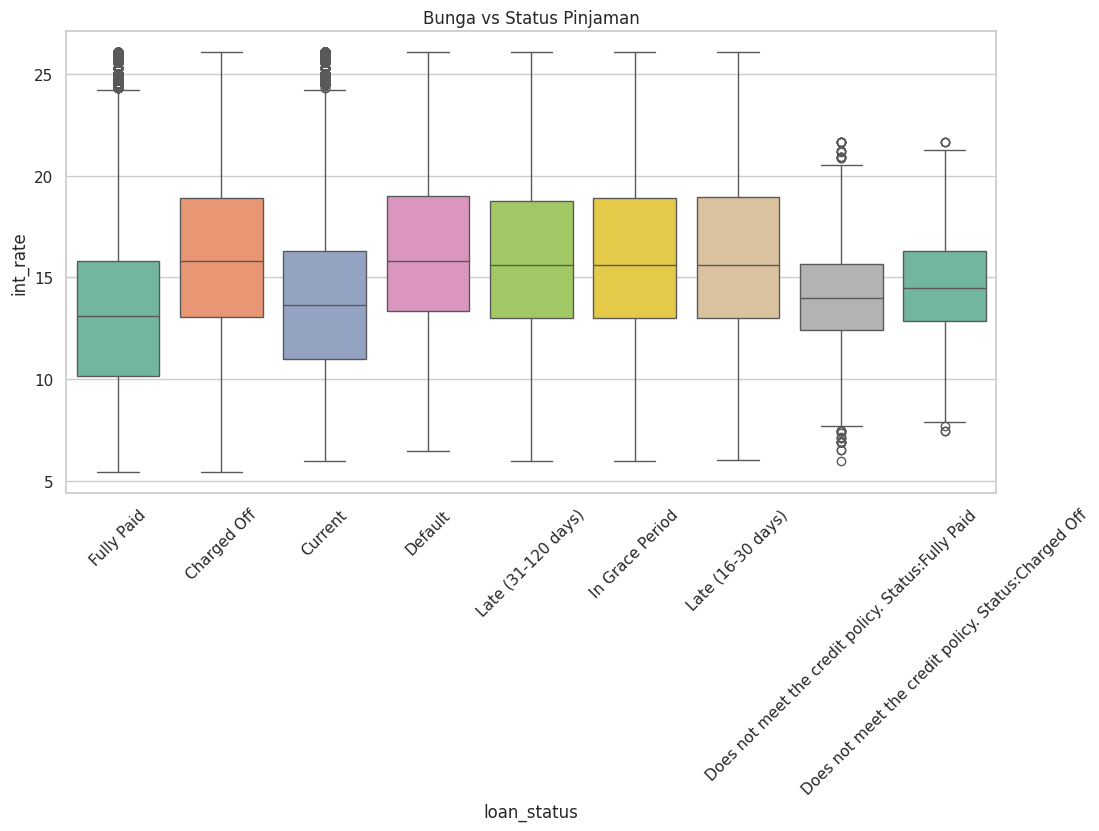

In [27]:
sns.boxplot(x='loan_status', y='int_rate', data=df, palette='Set2')
plt.title('Bunga vs Status Pinjaman')
plt.xticks(rotation=45)
plt.show()

#### Hasil Analisis

`int_rate` vs `loan_status
- Ini pola menarik: semakin tinggi bunga (int_rate), semakin tinggi kemungkinan gagal bayar.

Contoh:

Rata-rata bunga untuk Charged Off dan Default lebih tinggi dibanding Fully Paid.

- Logis, karena peminjam berisiko tinggi biasanya dikenakan bunga lebih besar → ini bisa jadi fitur kuat dalam model prediksi.

## **Korelasi Antar Fitur Numerik**

### Korelasi matriks hanya dengan kolom numerik

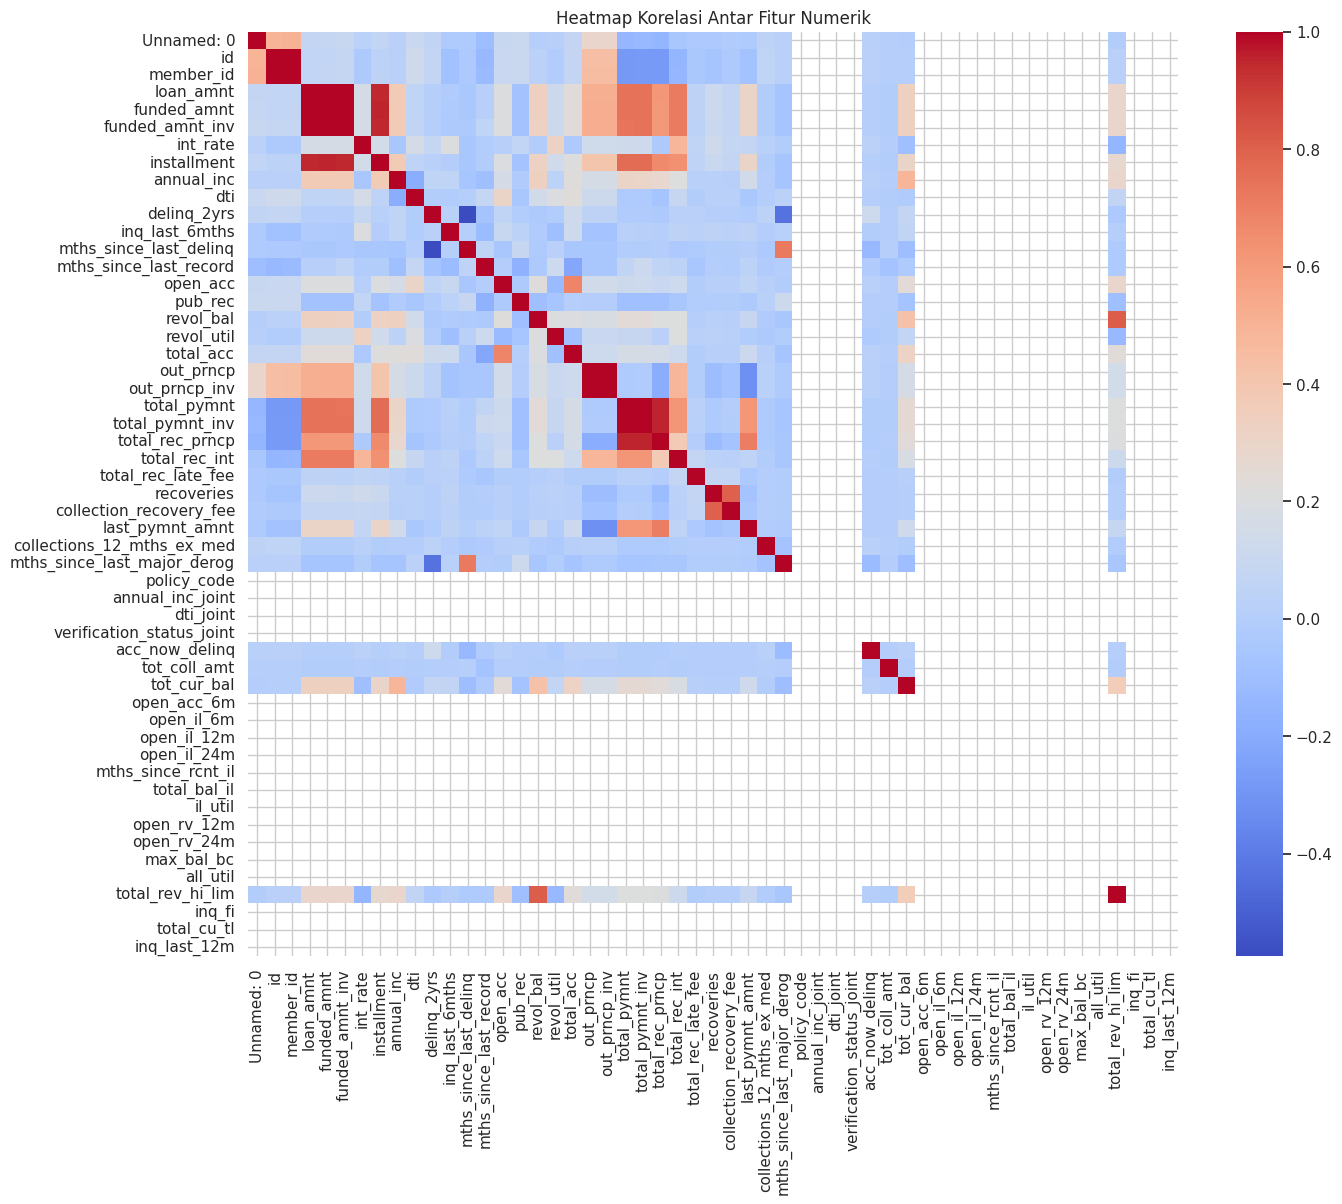

In [28]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

#### Hasil Analisis

Heatmap Korelasi Antar Fitur Numerik
- Korelasi kuat terlihat antara:

    loan_amnt, funded_amnt, funded_amnt_inv, dan installment → fitur ini sangat saling terkait.

    total_pymnt, total_rec_prncp, dan out_prncp → berhubungan dengan jumlah pembayaran.

- Sebagian besar fitur lainnya punya korelasi rendah, yang bisa bagus untuk keunikan masing-masing fitur saat dimasukkan ke model.

### Kesimpulan EDA

Insight dari EDA
- Fitur int_rate, loan_amnt, dan beberapa variabel keuangan sangat menjanjikan untuk prediksi risiko.

- Variabel loan_status perlu disederhanakan (misalnya: “baik” vs “buruk”) karena sangat beragam → penting untuk preprocessing.

- Dataset tidak seimbang antara pinjaman lancar dan gagal → bisa jadi masalah saat modelling (perlu penanganan seperti resampling).

- Beberapa fitur redundan atau sangat berkorelasi, perlu dipertimbangkan untuk dieliminasi agar menghindari multikolinearitas.

# **Data Preparation**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/loan_data_2007_2014.csv',low_memory=False)

In [3]:
# Menghapus Kolom dengan Kardinalitas tinggi
high_card_cols = ['emp_title', 'title', 'desc', 'url', 'zip_code', 'member_id', 'id']
df = df.drop(columns=[col for col in high_card_cols if col in df.columns], errors='ignore')

In [4]:
# Menghapus kolom yang memiliki missing value > 60%
missing_thresh = 0.6
df = df.loc[:, df.isnull().mean() < missing_thresh]

In [5]:
# Melakukan imputasi terhadap missing value, jika numerik gunakan median dan jika katagorikal gunakan modus
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-5-886e6622f7fb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-5-886e6622f7fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-5-886e6622f7fb>:6: FutureWarning: A value is trying to be set on a copy of a

In [6]:
# Encode `loan_status` jadi binary target
def simplify_status(status):
    return 1 if status not in ['Fully Paid', 'Current'] else 0

df['loan_status'] = df['loan_status'].apply(simplify_status)

In [7]:
# Encode fitur kategorikal yang penting dan low-cardinality
label_cols = ['term', 'grade', 'sub_grade', 'home_ownership',
              'verification_status', 'purpose', 'application_type']

for col in label_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [8]:
# Hapus kolom kategorikal lain yang belum diproses
drop_obj = df.select_dtypes(include='object').columns
df.drop(columns=drop_obj, inplace=True)

In [9]:
# Scaling
features = df.drop('loan_status', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
X = pd.DataFrame(X_scaled, columns=features.columns)
y = df['loan_status']

In [10]:
# Simpan data akhir
df_final = pd.concat([X, y], axis=1)
df_final.to_csv('/content/preprocessed_loan_data.csv', index=False)
print(" Data berhasil disimpan sebagai preprocessed_loan_data.csv")

 Data berhasil disimpan sebagai preprocessed_loan_data.csv


In [11]:
# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

Train shape: (373028, 39)
Test shape : (93257, 39)


<Figure size 1200x600 with 0 Axes>

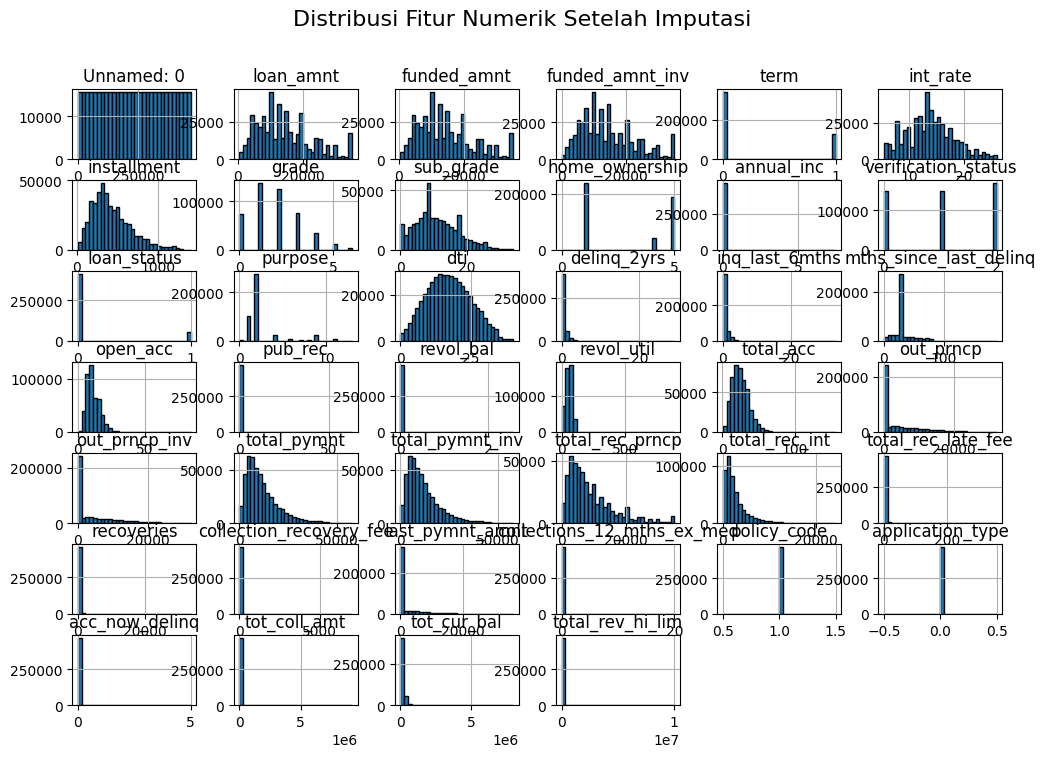

In [12]:
# Visualisasi distribusi fitur setelah imputasi
plt.figure(figsize=(12, 6))
df_imputed = df.copy()
numeric_cols = df_imputed.select_dtypes(include='number').columns
df_imputed[numeric_cols].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik Setelah Imputasi", fontsize=16)
plt.show()

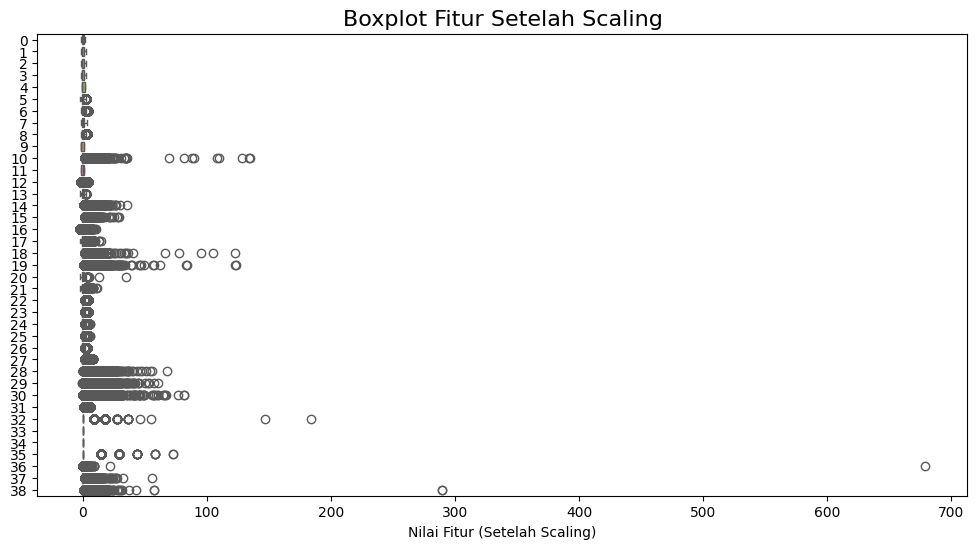

In [13]:
# Visualisasi boxplot untuk menunjukkan fitur setelah scaling
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_scaled, orient="h", palette="Set2")
plt.title("Boxplot Fitur Setelah Scaling", fontsize=16)
plt.xlabel("Nilai Fitur (Setelah Scaling)")
plt.show()

# **Membangun Model**

## Logistic Reggression

### Eksperimen 1

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Inisialisasi dan training model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [52]:
# Prediksi
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [53]:
# Evaluasi on test set
print("=== Evaluation on Test Set ===")
print("Accuracy :", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall   :", recall_score(y_test, y_pred_test))
print("F1 Score :", f1_score(y_test, y_pred_test))
print("ROC AUC  :", roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

=== Evaluation on Test Set ===
Accuracy : 0.9677343255734154
Precision: 0.986870897155361
Recall   : 0.7474703419399861
F1 Score : 0.8506477391174865
ROC AUC  : 0.9517013887345472

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     81793
           1       0.99      0.75      0.85     11464

    accuracy                           0.97     93257
   macro avg       0.98      0.87      0.92     93257
weighted avg       0.97      0.97      0.97     93257



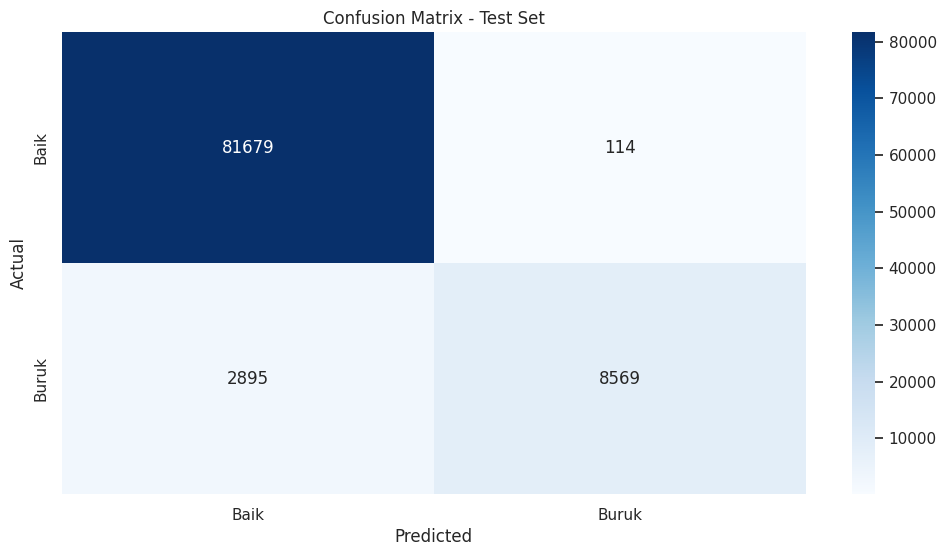

In [54]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Baik", "Buruk"], yticklabels=["Baik", "Buruk"])
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

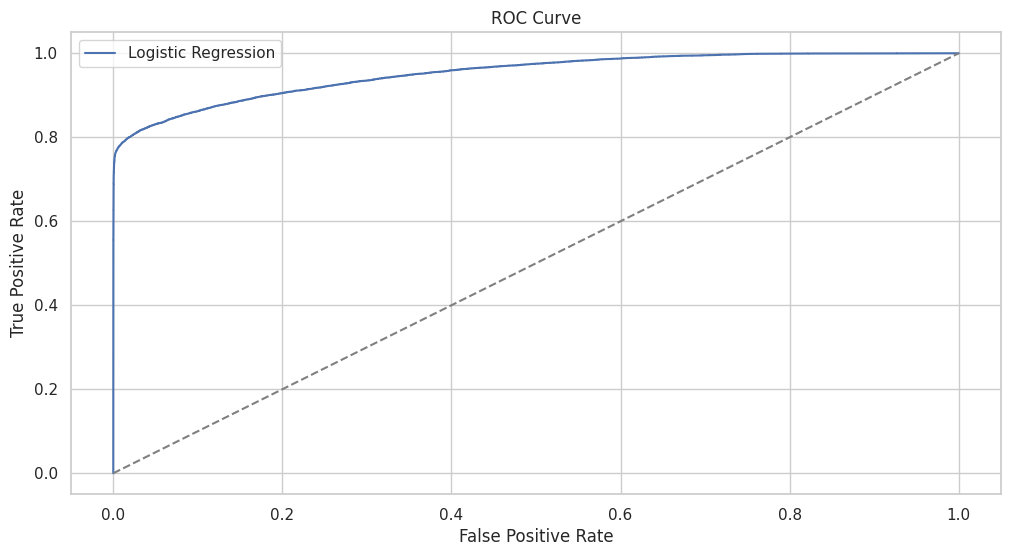

In [55]:
# ROC - Cruve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [56]:
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation ROC-AUC Scores:", cv_scores)
print("Average CV ROC-AUC:", cv_scores.mean())

print("Train Accuracy :", accuracy_score(y_train, y_pred_train))
print("Test Accuracy  :", accuracy_score(y_test, y_pred_test))

Cross-Validation ROC-AUC Scores: [0.94984874 0.95065264 0.9514618  0.94977127 0.95167926]
Average CV ROC-AUC: 0.9506827433389334
Train Accuracy : 0.9673268494590218
Test Accuracy  : 0.9677343255734154


### Eksperimen 2

In [57]:
from sklearn.metrics import precision_recall_curve
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [58]:
y_probs = logreg.predict_proba(X_test)[:, 1]

In [59]:
# Brute Force tresholds
thresholds = np.arange(0.1, 0.9, 0.05)
results = []

for t in thresholds:
    y_pred_thresh = (y_probs >= t).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    results.append((t, precision, recall, f1))

In [60]:
results_df = pd.DataFrame(results, columns=['Threshold', 'Precision', 'Recall', 'F1 Score'])
print(results_df)

    Threshold  Precision    Recall  F1 Score
0        0.10   0.687352  0.832868  0.753145
1        0.15   0.854269  0.800244  0.826375
2        0.20   0.924107  0.782798  0.847603
3        0.25   0.954467  0.773465  0.854486
4        0.30   0.968829  0.767271  0.856350
5        0.35   0.977390  0.761689  0.856162
6        0.40   0.981656  0.756193  0.854299
7        0.45   0.985150  0.752268  0.853101
8        0.50   0.986871  0.747470  0.850648
9        0.55   0.988157  0.742411  0.847836
10       0.60   0.989587  0.737788  0.845335
11       0.65   0.991284  0.734124  0.843540
12       0.70   0.991590  0.730199  0.841053
13       0.75   0.992124  0.725227  0.837936
14       0.80   0.993255  0.719382  0.834421
15       0.85   0.994041  0.713015  0.830396


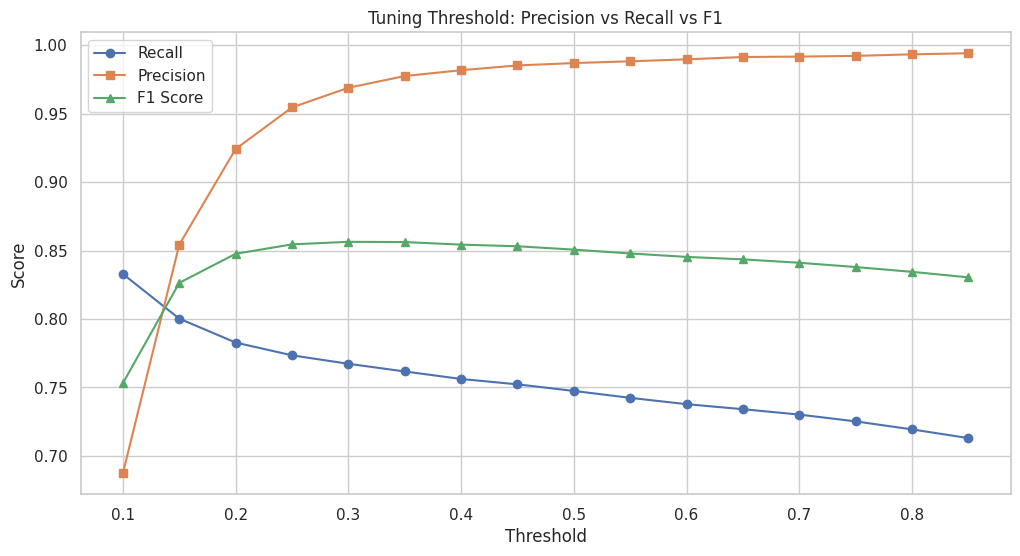

In [61]:
# Visualisasi
plt.plot(results_df['Threshold'], results_df['Recall'], label='Recall', marker='o')
plt.plot(results_df['Threshold'], results_df['Precision'], label='Precision', marker='s')
plt.plot(results_df['Threshold'], results_df['F1 Score'], label='F1 Score', marker='^')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Tuning Threshold: Precision vs Recall vs F1')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
optimal_threshold = 0.20

In [63]:
y_pred_new = (y_probs >= optimal_threshold).astype(int)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

print("== Evaluasi dengan Threshold =", optimal_threshold, "==")
print("Classification Report:\n", classification_report(y_test, y_pred_new))

== Evaluasi dengan Threshold = 0.2 ==
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     81793
           1       0.92      0.78      0.85     11464

    accuracy                           0.97     93257
   macro avg       0.95      0.89      0.91     93257
weighted avg       0.96      0.97      0.96     93257



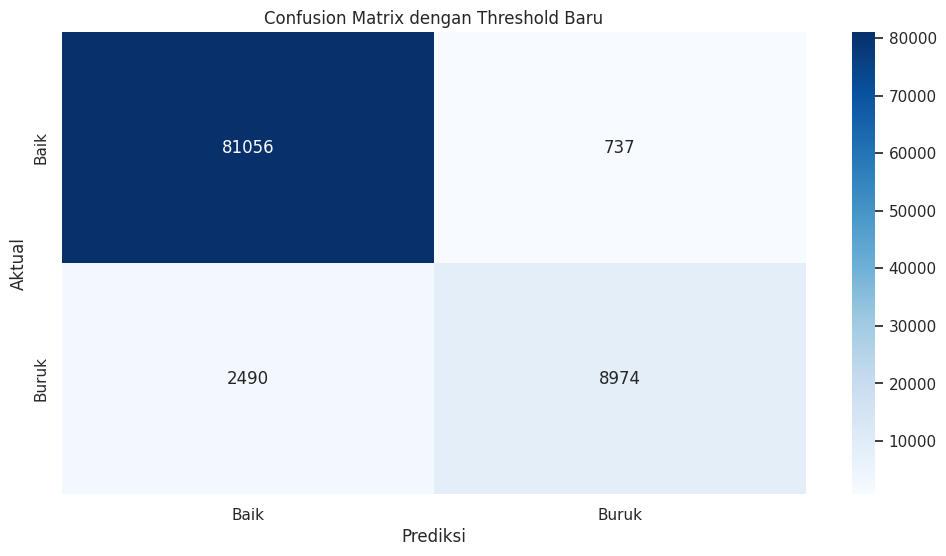

In [65]:
# Confusion matrix baru
sns.heatmap(confusion_matrix(y_test, y_pred_new), annot=True, fmt="d", cmap="Blues", xticklabels=["Baik", "Buruk"], yticklabels=["Baik", "Buruk"])
plt.title("Confusion Matrix dengan Threshold Baru")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

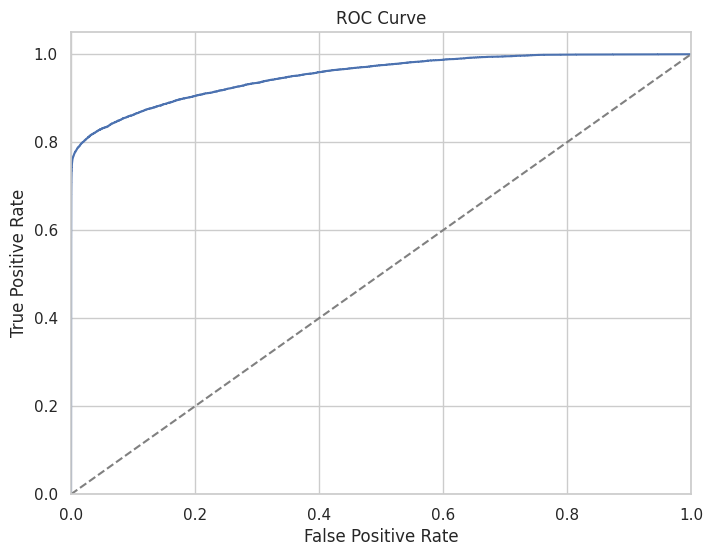

In [70]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = logreg.predict_proba(X_test)[:, 1]

optimal_threshold = 0.20
y_pred_new = (y_prob >= optimal_threshold).astype(int)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (threshold = {optimal_threshold}, AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


#### Hasil Logistic Reggression

**Data Modelling – Logistic Regression**
#### 1. **Pemilihan Model**

Model yang digunakan dalam tahap awal pengembangan sistem prediksi risiko kredit adalah Logistic Regression. Pemilihan model ini didasarkan pada karakteristik masalah klasifikasi biner (baik vs. buruk) serta kemampuannya yang baik sebagai baseline model karena:

  - Cepat dalam proses pelatihan,
  - Dapat diinterpretasi,
  - Tidak terlalu kompleks namun cukup akurat untuk skenario awal.

  Target variabel (loan_status) disederhanakan menjadi dua kelas:

  - 0: pinjaman baik (Fully Paid atau Current),
  - 1: pinjaman berisiko/gagal (selain itu, seperti Charged Off, Default, Late, dsb).

#### 2. **Pelatihan Model**

Model dilatih menggunakan dataset hasil preprocessing yang terdiri dari:

  - Fitur numerik yang telah diskalakan menggunakan StandardScaler,

  - Fitur kategorikal yang telah diencode menggunakan LabelEncoder,

  - Split data dilakukan dengan rasio 80:20 antara train dan test, menggunakan stratified sampling agar proporsi kelas tetap seimbang.

  Model Logistic Regression dilatih menggunakan parameter default, dengan batas iterasi sebesar 1000.

#### 3. **Evaluasi Awal (Threshold Default 0.5)**

Hasil evaluasi model pada threshold default (0.5) ditunjukkan sebagai berikut:


| Metrik           | Nilai   |
|------------------|---------|
| Accuracy         | 96.77%  |
| Precision        | 98.69%  |
| Recall           | 74.74%  |
| F1 Score         | 85.06%  |
| ROC AUC Score    | 95.17%  |

Model menunjukkan akurasi dan precision yang sangat tinggi, namun nilai recall relatif lebih rendah, yang menunjukkan bahwa model masih melewatkan beberapa kasus gagal bayar (false negative).

#### 4. **Tuning Threshold untuk Optimasi Recall**

Untuk meningkatkan kemampuan model dalam mendeteksi pinjaman gagal bayar, dilakukan penyesuaian threshold prediksi probabilitas. Threshold diturunkan dari 0.5 ke 0.2, dengan hasil evaluasi sebagai berikut:


| Metrik           | Nilai   |
|------------------|---------|
| Accuracy         | 96.68%  |
| Precision        | 92.41%  |
| Recall           | 78.27%  |
| F1 Score         | 84.76%  |
| ROC AUC Score    | ~95.17% |

Hasil ini menunjukkan peningkatan signifikan pada recall, dengan sedikit penurunan precision dan akurasi yang masih dalam batas sangat baik.

#### 5. **Confusion Matrix Threshold 0.20**

Model berhasil mengklasifikasikan lebih banyak kasus buruk dengan threshold yang diturunkan, sehingga menjadi lebih sensitif terhadap risiko kredit, tanpa banyak mengorbankan performa umum model.

|                   | Prediksi Baik | Prediksi Buruk |
|-------------------|---------------|----------------|
| Aktual Baik (0)   | 81.056        | 737            |
| Aktual Buruk (1)  | 2.490         | 8.974          |


#### **Kesimpulan**

- Model dengan threshold default (0.5) lebih baik dalam mendeteksi pinjaman yang baik tanpa melewatkan banyak data, menghasilkan recall 1.00, F1 Score 0.98, dan akurasi yang lebih tinggi.

- Model dengan threshold 0.20 lebih konservatif dalam mengklasifikasikan pinjaman sebagai baik. Ini meningkatkan precision (karena lebih hati-hati dalam memberi label baik), tetapi recall menurun, yang berarti beberapa pinjaman baik terlewatkan.

#### **Rekomendasi**

- Jika tujuan utama adalah meminimalkan kesalahan dalam mendeteksi pinjaman baik, threshold default (0.5) lebih baik karena memberikan recall yang lebih tinggi.

- Jika model perlu lebih selektif dalam mendeteksi pinjaman baik (menghindari false positives), threshold 0.20 mungkin lebih cocok meskipun ada penurunan recall.

## Random Forest

### Eksperimen 1

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
# Inisialisasi dan training
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
# Prediksi
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [75]:
# Evaluasi
print("=== Random Forest Evaluation ===")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1 Score :", f1_score(y_test, y_pred_rf))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

=== Random Forest Evaluation ===
Accuracy : 0.9758409556387188
Precision: 0.9935698210266852
Recall   : 0.808705512909979
F1 Score : 0.8916566482327483
ROC AUC  : 0.9815096335217026

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     81793
           1       0.99      0.81      0.89     11464

    accuracy                           0.98     93257
   macro avg       0.98      0.90      0.94     93257
weighted avg       0.98      0.98      0.97     93257



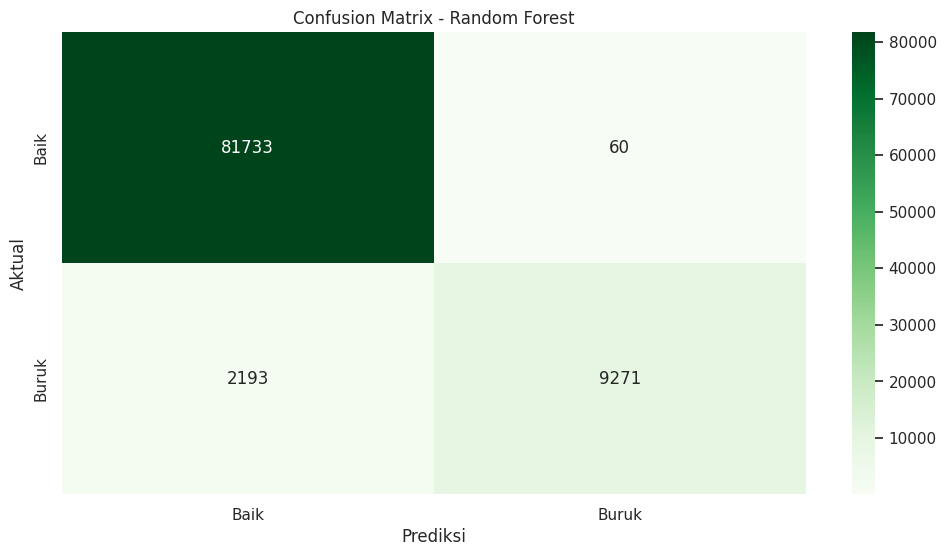

In [76]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens", xticklabels=["Baik", "Buruk"], yticklabels=["Baik", "Buruk"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

In [77]:
# Feature Importance
importances = rf.feature_importances_
feat_names = X_train.columns
feature_df = pd.DataFrame({'Fitur': feat_names, 'Importance': importances})
top_features = feature_df.sort_values(by='Importance', ascending=False).head(15)

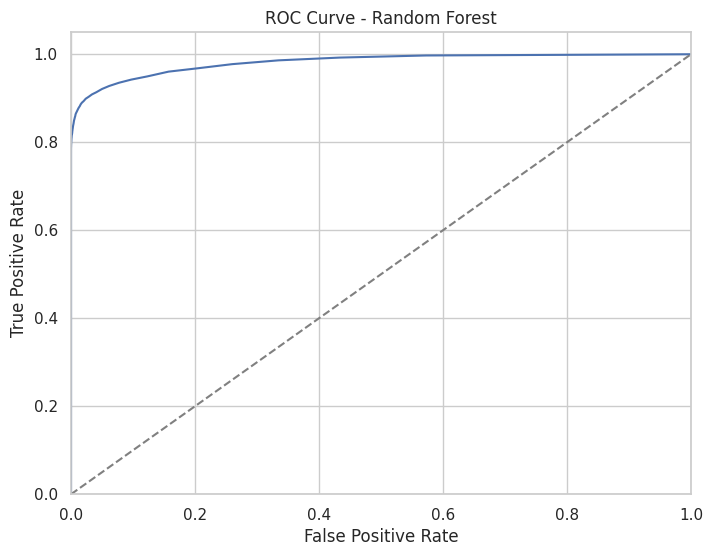

In [84]:
# Plot ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='b')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.show()

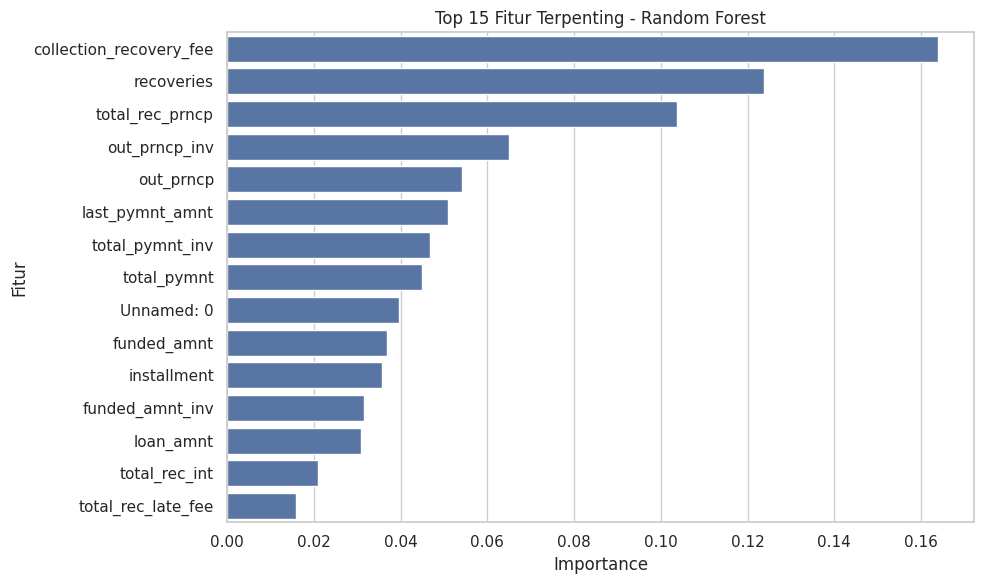

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Fitur', data=top_features)
plt.title('Top 15 Fitur Terpenting - Random Forest')
plt.tight_layout()
plt.show()

### Eksperimen 2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.metrics import classification_report, roc_auc_score
import time


In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
# Inisialisasi
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid,
                           scoring='roc_auc', cv=3, verbose=2, n_jobs=-1)

In [ ]:
start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()
print(f"Waktu Grid Search: {round(end - start, 2)} detik")

In [ ]:
print("\n Best Params:", grid_search.best_params_)
print(" Best ROC-AUC Score (CV):", grid_search.best_score_)

In [ ]:
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:, 1]

In [ ]:
print("\n=== Evaluasi di Test Set (Model Terbaik) ===")
print("Accuracy :", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall   :", recall_score(y_test, y_pred_best))
print("F1 Score :", f1_score(y_test, y_pred_best))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

### Eksperimen 3

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Waktu RandomizedSearch: 4891.78 detik

Best Params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': None}
Best ROC-AUC Score (CV): 0.980047795878825

=== Evaluasi di Test Set (Model Terbaik) ===
Accuracy : 0.9750260034099317
Precision: 0.9942646899686182
Recall   : 0.8014654570830426
F1 Score : 0.8875150929727119
ROC AUC  : 0.9833270874233613


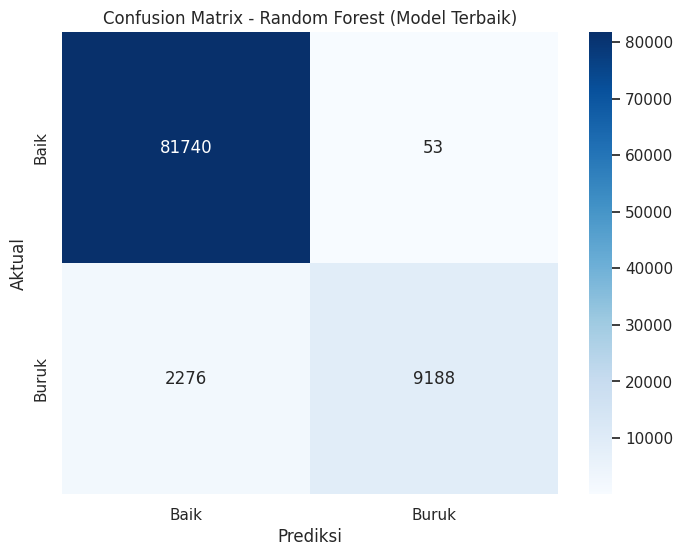

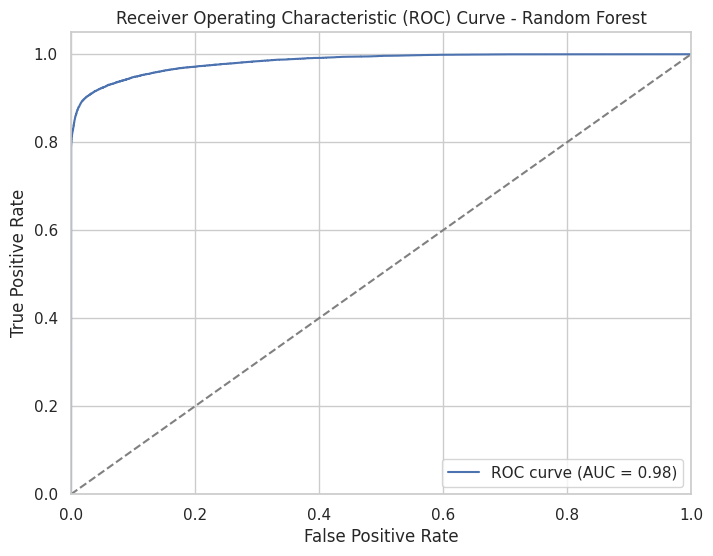

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.metrics import classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

# Parameter grid
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'max_features': ['sqrt', 'log2']
}

# Inisialisasi RandomForest dan RandomizedSearch
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)
random_search = RandomizedSearchCV(estimator=rf_base, param_distributions=param_dist,
                                   n_iter=10, scoring='roc_auc', cv=3, verbose=2, n_jobs=-1)

# Fit RandomizedSearchCV
start = time.time()
random_search.fit(X_train, y_train)
end = time.time()

# Hasil terbaik
print(f"Waktu RandomizedSearch: {round(end - start, 2)} detik")
print("\nBest Params:", random_search.best_params_)
print("Best ROC-AUC Score (CV):", random_search.best_score_)

# Evaluasi model terbaik
best_rf = random_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:, 1]

print("\n=== Evaluasi di Test Set (Model Terbaik) ===")
print("Accuracy :", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall   :", recall_score(y_test, y_pred_best))
print("F1 Score :", f1_score(y_test, y_pred_best))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_best))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Baik", "Buruk"], yticklabels=["Baik", "Buruk"])
plt.title("Confusion Matrix - Random Forest (Model Terbaik)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


#### Hasil Random Forest

**Data Modelling – Random Forest**
#### 1. **Pemilihan Model**

Dalam tahap Data Modelling ini, kita mengembangkan model Random Forest untuk memprediksi risiko kredit berdasarkan dataset yang telah diproses. Random Forest adalah model ensemble yang terdiri dari banyak pohon keputusan, yang memberikan akurasi tinggi dan tahan terhadap overfitting.

Saya melakukan dua eksperimen untuk membandingkan performa:

- Random Forest (Default): Model ini menggunakan parameter default dari RandomForestClassifier tanpa penyesuaian hyperparameter.

- Random Forest dengan RandomizedSearchCV: Hyperparameter tuning dilakukan menggunakan RandomizedSearchCV untuk mengoptimalkan parameter model dan meningkatkan performa.


#### 2. **Random Forest (Default)**

Pada eksperimen pertama, model Random Forest dilatih menggunakan parameter default.

##### Hasil Evaluasi:

| Metrik           | Nilai   |
|------------------|---------|
| Accuracy         | 97.58%  |
| Precision        | 99.36%  |
| Recall           | 80.87%  |
| F1 Score         | 89.16%  |
| ROC AUC Score    | 98.15%  |

- **Accuracy** sangat tinggi, menunjukkan bahwa sebagian besar prediksi model tepat.
- **Precision** sangat baik (99.36%), namun recall (80.87%) menunjukkan bahwa ada beberapa false negative (pinjaman berisiko yang tidak terdeteksi).
- **ROC AUC** adalah 98.15%, menunjukkan bahwa model mampu membedakan dengan baik antara pinjaman baik dan buruk.

##### Confusion Matrix (Default):

|                   | Prediksi Baik | Prediksi Buruk |
|-------------------|---------------|----------------|
| Aktual Baik (0)   | 81.733        | 60             |
| Aktual Buruk (1)  | 2.193         | 9.271          |

#### 3. **Random Forest dengan RandomizedSearchCV**

Pada eksperimen kedua, saya melakukan tuning hyperparameter menggunakan **RandomizedSearchCV** untuk mencari parameter terbaik.

##### Hasil Evaluasi:

| Metrik           | Nilai   |
|------------------|---------|
| Accuracy         | 97.50%  |
| Precision        | 99.42%  |
| Recall           | 80.14%  |
| F1 Score         | 88.75%  |
| ROC AUC Score    | 98.33%  |

- **Accuracy** hampir identik dengan model default, tetapi recall sedikit menurun ke 80.14%, menunjukkan bahwa model lebih baik dalam mendeteksi pinjaman yang berisiko gagal bayar.
- **Precision** tetap sangat tinggi (99.42%).
- **ROC AUC** meningkat menjadi 98.33%, menunjukkan kemampuan model yang lebih baik dalam memisahkan kelas baik dan buruk.

##### Confusion Matrix (RandomizedSearchCV)

|                   | Prediksi Baik | Prediksi Buruk |
|-------------------|---------------|----------------|
| Aktual Baik (0)   | 81.740        | 53             |
| Aktual Buruk (1)  | 2.276         | 9.188          |

#### 4. **Perbandingan Model**

| Model                                | Accuracy | Precision | Recall  | F1 Score | ROC AUC |
|--------------------------------------|----------|-----------|---------|----------|---------|
| Random Forest (Default)              | 97.58%   | 99.36%    | 80.87%  | 89.17%   | 98.15%  |
| Random Forest (RandomizedSearchCV)   | 97.50%   | 99.42%    | 80.14%  | 88.75%   | 98.33%  |

##### Poin-poin Kunci:
- **Akurasi** dan **Precision**: Kedua model hampir identik dalam hal akurasi dan precision, dengan sedikit perbedaan antara model default dan RandomizedSearchCV.
- **Recall**: Model dengan RandomizedSearchCV memberikan sedikit penurunan recall (80.14%) dibandingkan model default (80.87%).
- **ROC AUC**: RandomizedSearchCV memberikan peningkatan kecil dalam ROC AUC (98.27% vs 98.15%).

#### **Kesimpulan**
- Random Forest (Default) memiliki sedikit keunggulan dalam accuracy, recall, dan F1 score. Ini menunjukkan bahwa model default sedikit lebih baik dalam mendeteksi pinjaman berisiko dan menghindari false negatives.

- Random Forest (RandomizedSearchCV) memiliki sedikit keunggulan dalam precision dan ROC AUC. Ini menunjukkan bahwa model RandomizedSearchCV lebih baik dalam menghindari false positives dan lebih baik dalam membedakan antara dua kelas.

### **Rekomendasi**

Jika keseimbangan antara precision dan recall lebih penting, model Default mungkin lebih baik. Namun, jika kamu lebih mengutamakan kemampuan model dalam membedakan kedua kelas dengan lebih baik (ROC AUC), maka RandomizedSearchCV bisa menjadi pilihan yang lebih tepat.

## XGBoost

### Eksperimen 1

In [24]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, auc, accuracy_score, precision_score, recall_score, f1_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [13]:
# Inisialisasi model XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False)

In [14]:
# grid parameter untuk pencarian hyperparameter
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

In [15]:
# GridSearchCV untuk pencarian parameter terbaik
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=2, n_jobs=-1)


In [16]:
# Fit model
start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()
print(f"⏱️ Waktu Grid Search: {round(end - start, 2)} detik")


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:00:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


⏱️ Waktu Grid Search: 2034.69 detik


In [17]:
#Hasil terbaik
print("\n Best Params:", grid_search.best_params_)
print(" Best ROC-AUC Score (CV):", grid_search.best_score_)


 Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}
 Best ROC-AUC Score (CV): 0.9909701592909417


In [18]:
# Evaluasi model terbaik
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)
y_prob_best = best_xgb.predict_proba(X_test)[:, 1]


In [21]:
print("\n=== Evaluasi di Test Set (Model Terbaik) ===")
print("Accuracy :", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall   :", recall_score(y_test, y_pred_best))
print("F1 Score :", f1_score(y_test, y_pred_best))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


=== Evaluasi di Test Set (Model Terbaik) ===
Accuracy : 0.9853523059931159
Precision: 0.9965578284815106
Recall   : 0.883897418004187
F1 Score : 0.9368528106508875
ROC AUC  : 0.9930520368640496

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     81793
           1       1.00      0.88      0.94     11464

    accuracy                           0.99     93257
   macro avg       0.99      0.94      0.96     93257
weighted avg       0.99      0.99      0.98     93257



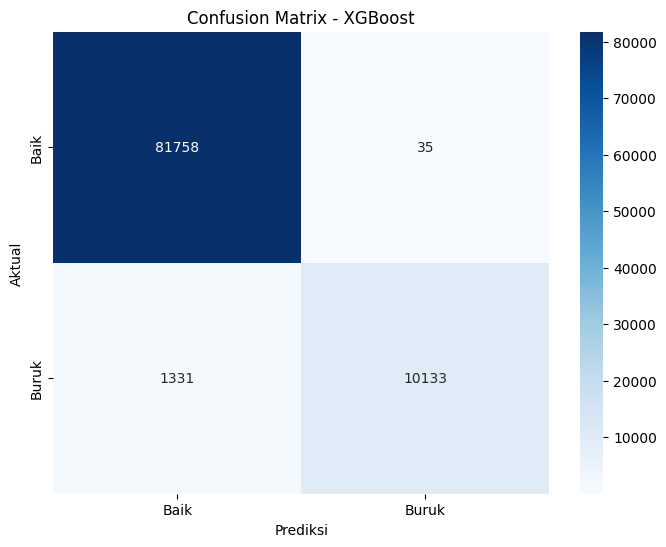

In [22]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Baik", "Buruk"], yticklabels=["Baik", "Buruk"])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

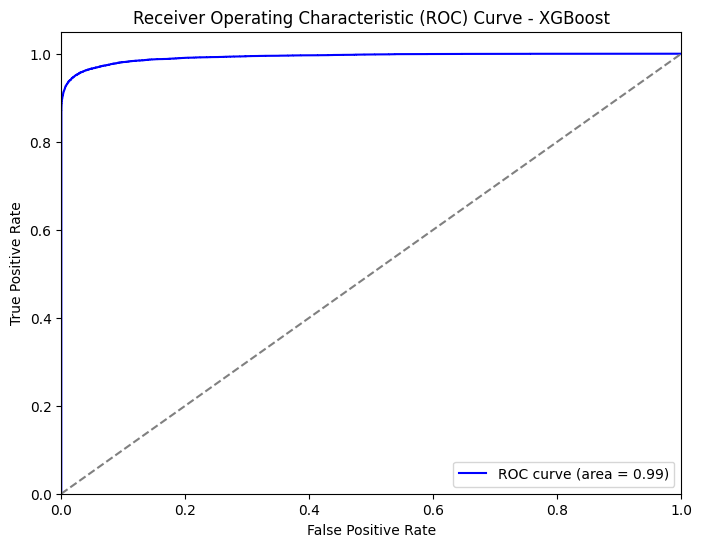

In [25]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

#### Hasil XGboost

Data Modelling – XGBoost
#### 1. **Pemilihan Model**
Model XGBoost menggunakan parameter default untuk mengklasifikasikan risiko kredit dalam dataset yang diberikan. Model ini dilatih menggunakan XGBoostClassifier yang sudah di-tune menggunakan parameter default dan dilatih menggunakan training set yang telah disiapkan.

#### 2. **Metrik Evaluasi Model pada Test Set**

| Metrik       | Nilai   |
|--------------|---------|
| Accuracy     | 98.54%  |
| Precision    | 99.66%  |
| Recall       | 88.39%  |
| F1 Score     | 93.69%  |
| ROC AUC      | 99.31%  |

#### 3. **Confusion Matrix**

Confusion Matrix pada test set menunjukkan perbandingan antara nilai aktual dan prediksi dari model. Berikut adalah matrix untuk model XGBoost (Default Parameters):

|                   | Prediksi Baik | Prediksi Buruk |
|-------------------|---------------|----------------|
| Aktual Baik (0)   | 81.758        | 35             |
| Aktual Buruk (1)  | 1.331         | 10.133         |

##### **Interpretasi**
- **True Positives (Baik)**: 81.758 pinjaman benar-benar baik yang diprediksi sebagai baik.
- **False Negatives (Buruk)**: 1.331 pinjaman yang sebenarnya buruk, tetapi diprediksi sebagai baik.
- **False Positives (Baik)**: 35 pinjaman yang sebenarnya baik tetapi diprediksi sebagai buruk.
- **True Negatives (Buruk)**: 10.133 pinjaman benar-benar buruk yang diprediksi sebagai buruk.

#### 4. **ROC Curve**
Model XGBoost dengan parameter default menghasilkan ROC Curve yang sangat baik, menunjukkan kemampuan model dalam membedakan antara pinjaman baik dan buruk. AUC (Area Under Curve) untuk model ini adalah 99.31%, yang menandakan model memiliki kemampuan sebaik atau lebih baik dalam memisahkan dua kelas, yaitu baik dan buruk.

#### 5. **Evaluasi Berdasarkan Kinerja Metrik**
- Accuracy: Model ini mencapai 98.54% akurasi, yang berarti model dapat memprediksi dengan benar sekitar 98,5% dari seluruh data test.
- Precision: Dengan 99.66%, model ini memiliki precision yang sangat baik dalam mengidentifikasi pinjaman yang baik.
- Recall: Model ini memiliki recall 88.39%, yang menunjukkan bahwa model dapat mendeteksi 88,39% pinjaman buruk dengan benar.
- F1 Score: Model memiliki F1 Score 93.69%, yang menunjukkan keseimbangan yang sangat baik antara precision dan recall.
- ROC AUC: Dengan AUC 99.31%, model memiliki kemampuan superior dalam memisahkan kelas baik dan buruk.

#### **Kesimpulan**
Model XGBoost dengan parameter default menunjukkan kinerja yang sangat baik dalam mengklasifikasikan pinjaman dengan risiko kredit. Meskipun terdapat sedikit false negatives, model ini dapat mengklasifikasikan pinjaman dengan sangat baik dalam hal precision, recall, dan ROC AUC. AUC yang tinggi menandakan bahwa model sangat efisien dalam membedakan antara dua kelas, dengan recall yang lebih rendah menunjukkan bahwa model ini sedikit lebih cenderung untuk memprediksi pinjaman yang baik daripada buruk (menghindari false positives).

# **KESIMPULAN**

## Tabel Perbandingan Metrik Evaluasi untuk Setiap Model:

| Model                        | Accuracy | Precision | Recall  | F1 Score | ROC AUC |
|------------------------------|----------|-----------|---------|----------|---------|
| Logistic Regression           | 96.77%   | 98.69%    | 74.75%  | 85.06%   | 95.17%  |
| Random Forest (Default)       | 97.58%   | 99.36%    | 80.87%  | 89.17%   | 98.15%  |
| Random Forest (RandomizedSearch) | 97.50%   | 99.42%    | 80.14%  | 88.75%   | 98.33%  |
| XGBoost (Default)             | 98.54%   | 99.66%    | 88.39%  | 93.69%   | 99.31%  |

---

## Kesimpulan

- **Model Terbaik**: Berdasarkan AUC dan F1 Score, **XGBoost** dengan parameter default menunjukkan performa terbaik.
- **Random Forest (Default)** memberikan keseimbangan yang sangat baik antara **Precision** dan **Recall**, menjadikannya model yang sangat baik jika lebih mengutamakan deteksi risiko kredit.
- **Logistic Regression** memberikan hasil yang stabil, tetapi model ini sedikit kurang baik dibandingkan dengan **Random Forest** dan **XGBoost** dalam hal **recall** dan **AUC**.

## Rekomendasi:
Model **XGBoost** dapat digunakan untuk aplikasi prediksi risiko kredit jika fokus pada kemampuan membedakan kelas dengan **AUC** tinggi dan **recall** yang baik.